In [35]:
from tensorflow.keras.datasets import fashion_mnist

In [36]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [37]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [38]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)

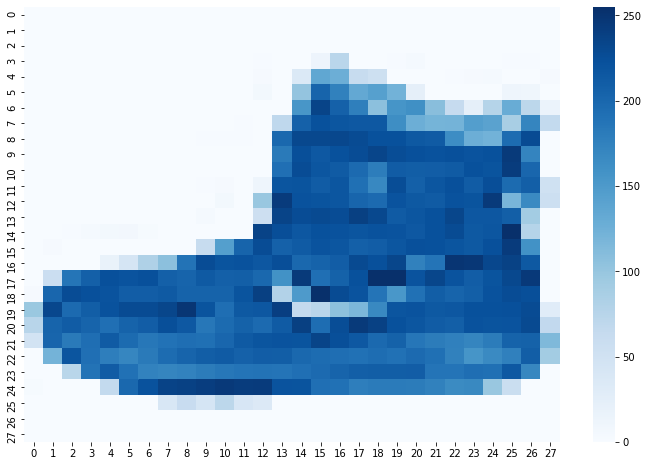

In [39]:
sns.heatmap(x_train[0], cmap='Blues')

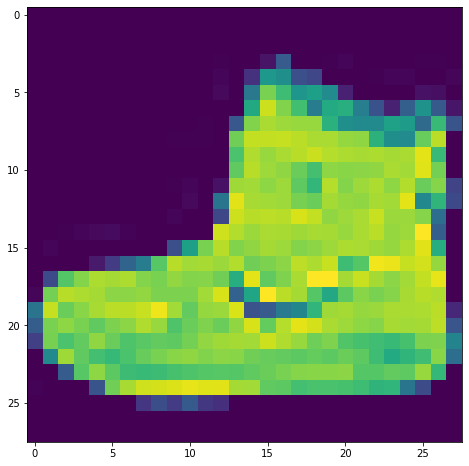

In [40]:
plt.imshow(x_train[0])

In [41]:
x_train, x_test = x_train/255, x_test/255

In [42]:
x_train.max(), x_train.min()

(1.0, 0.0)

In [43]:
x_train, x_test = x_train.reshape(60000,28,28,1), x_test.reshape(10000,28,28,1)

In [44]:
x_train.shape

(60000, 28, 28, 1)

In [45]:
x_test.shape

(10000, 28, 28, 1)

In [46]:
from tensorflow.keras.utils import to_categorical

In [47]:
y_train_encoded = to_categorical(y_train,10)
y_test_encoded = to_categorical(y_test,10)

In [48]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [49]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(4,4), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
model.fit(x_train, y_train_encoded, validation_data=(x_test, y_test_encoded), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 45s 744us/sample - loss: 0.4085 - accuracy: 0.8547 - val_loss: 0.3309 - val_accuracy: 0.8846
Epoch 2/5
60000/60000 [==============================] - 45s 750us/sample - loss: 0.2793 - accuracy: 0.8981 - val_loss: 0.2912 - val_accuracy: 0.8937
Epoch 3/5
60000/60000 [==============================] - 44s 731us/sample - loss: 0.2377 - accuracy: 0.9120 - val_loss: 0.2827 - val_accuracy: 0.8987
Epoch 4/5
60000/60000 [==============================] - 45s 747us/sample - loss: 0.2051 - accuracy: 0.9233 - val_loss: 0.2648 - val_accuracy: 0.9059
Epoch 5/5
60000/60000 [==============================] - 44s 729us/sample - loss: 0.1793 - accuracy: 0.9329 - val_loss: 0.2772 - val_accuracy: 0.9090


In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            multiple                  544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  589952    
_________________________________________________________________
dense_3 (Dense)              multiple                  1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.metrics_names

['loss', 'accuracy']

In [53]:
metrics = pd.DataFrame(model.history.history)

In [54]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

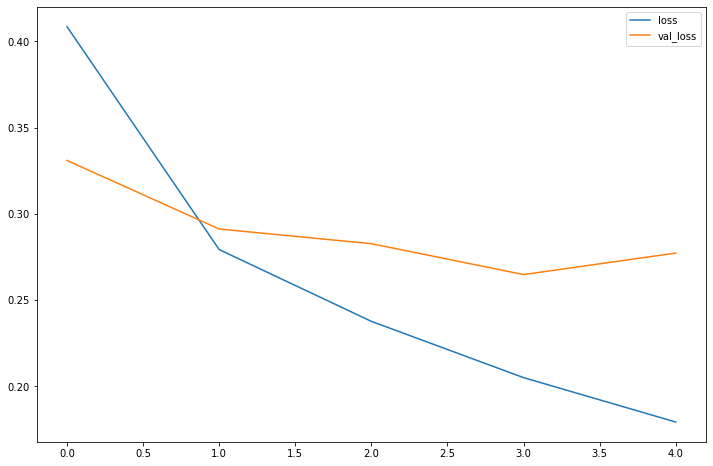

In [55]:
metrics[['loss','val_loss']].plot()

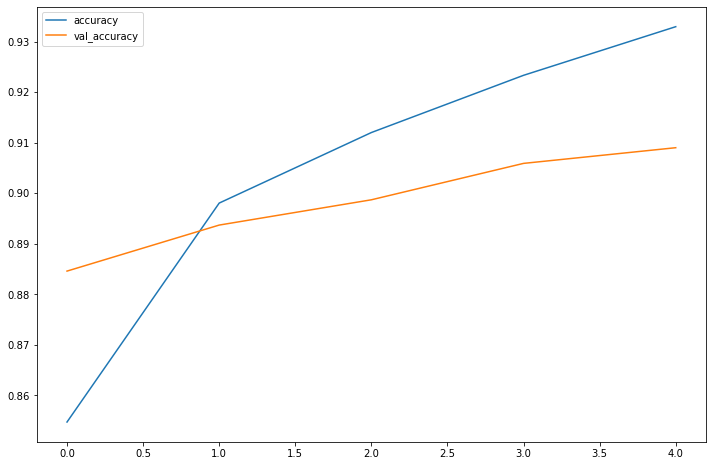

In [56]:
metrics[['accuracy','val_accuracy']].plot()

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
predictions = model.predict_classes(x_test)

In [59]:
print(confusion_matrix(y_test, predictions))

[[888   0  11  24   4   0  68   0   5   0]
 [  3 970   0  20   5   0   0   0   2   0]
 [ 19   0 833  13  79   0  55   0   1   0]
 [ 10   0   7 965   8   0   7   0   3   0]
 [  0   1  35  50 882   0  30   0   2   0]
 [  0   0   0   0   0 966   0  25   0   9]
 [122   0  52  41 111   0 663   0  11   0]
 [  0   0   0   0   0   4   0 986   1   9]
 [  2   0   0   5   2   1   0   1 989   0]
 [  1   0   0   0   0   6   0  45   0 948]]


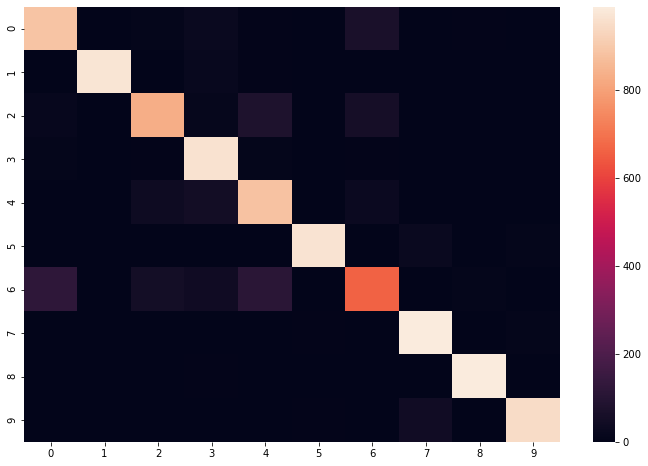

In [60]:
sns.heatmap(confusion_matrix(y_test, predictions))

In [61]:
print(classification_report(y_test, predictions))

precision    recall  f1-score   support

           0       0.85      0.89      0.87      1000
           1       1.00      0.97      0.98      1000
           2       0.89      0.83      0.86      1000
           3       0.86      0.96      0.91      1000
           4       0.81      0.88      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.81      0.66      0.73      1000
           7       0.93      0.99      0.96      1000
           8       0.98      0.99      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [89]:
from tensorflow.keras.models import load_model

In [90]:
model.save('Keras-Fashion-modle.h5')

In [97]:
y_test_encoded.shape

(10000, 10)

In [98]:
y_test.shape

(10000,)

In [99]:
y_test.reshape(y_test.shape[0],1)

array([[9],
       [2],
       [1],
       ...,
       [8],
       [1],
       [5]], dtype=uint8)

In [104]:
import numpy as np

randomInteger = np.random.randint(0,10)

In [105]:
test = x_test[randomInteger]

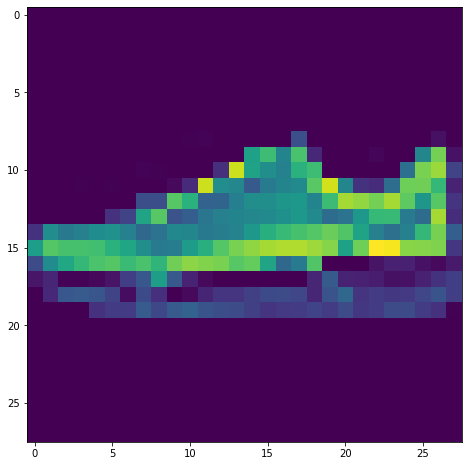

In [106]:
plt.imshow(test.reshape(28,28))

In [110]:
res = model.predict_classes(test.reshape(1,28,28,1))[0]

In [109]:
lables = {
0: 'T-shirt/top',
1: 'Trouser/pants',
2: 'Pullover shirt',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot',
}

In [111]:
res

7

In [112]:
lables.get(res)

'Sneaker'